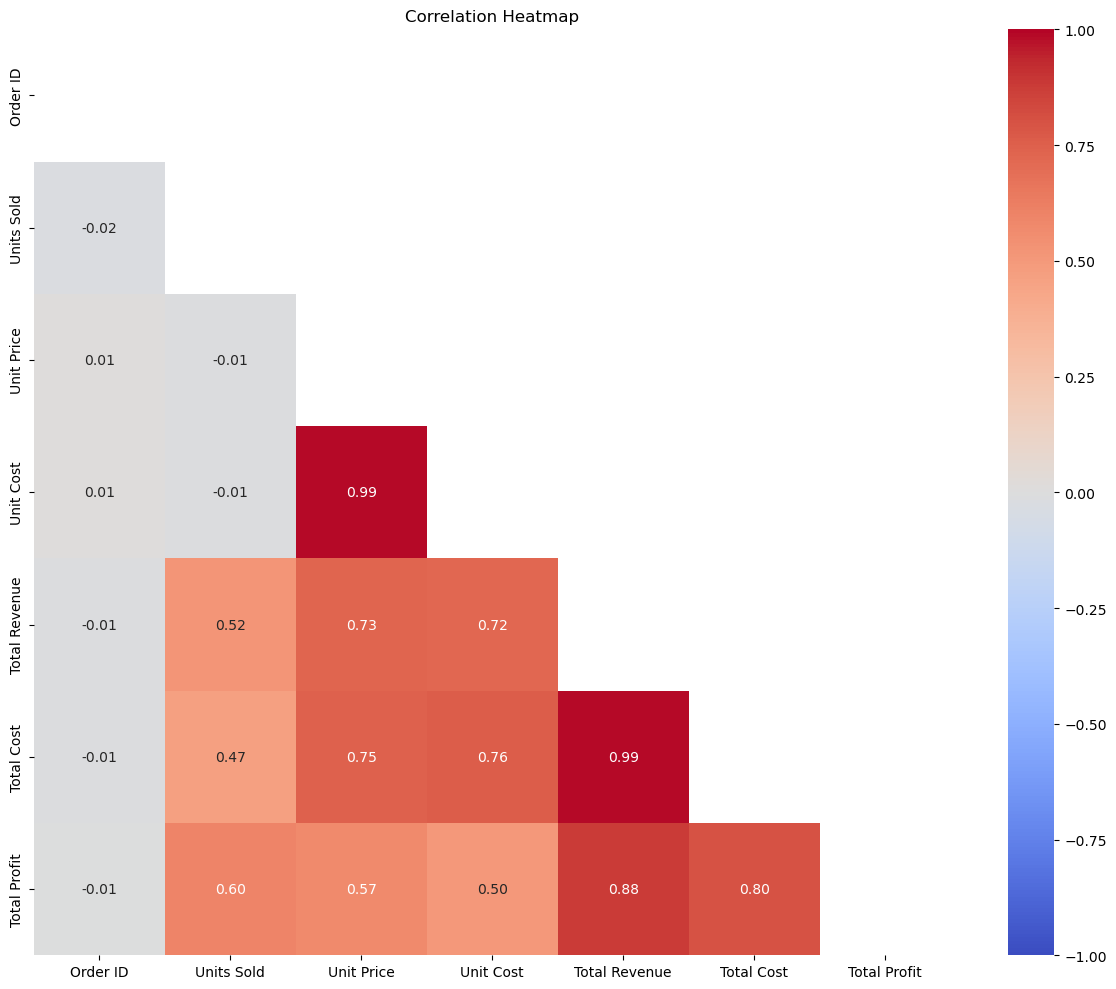

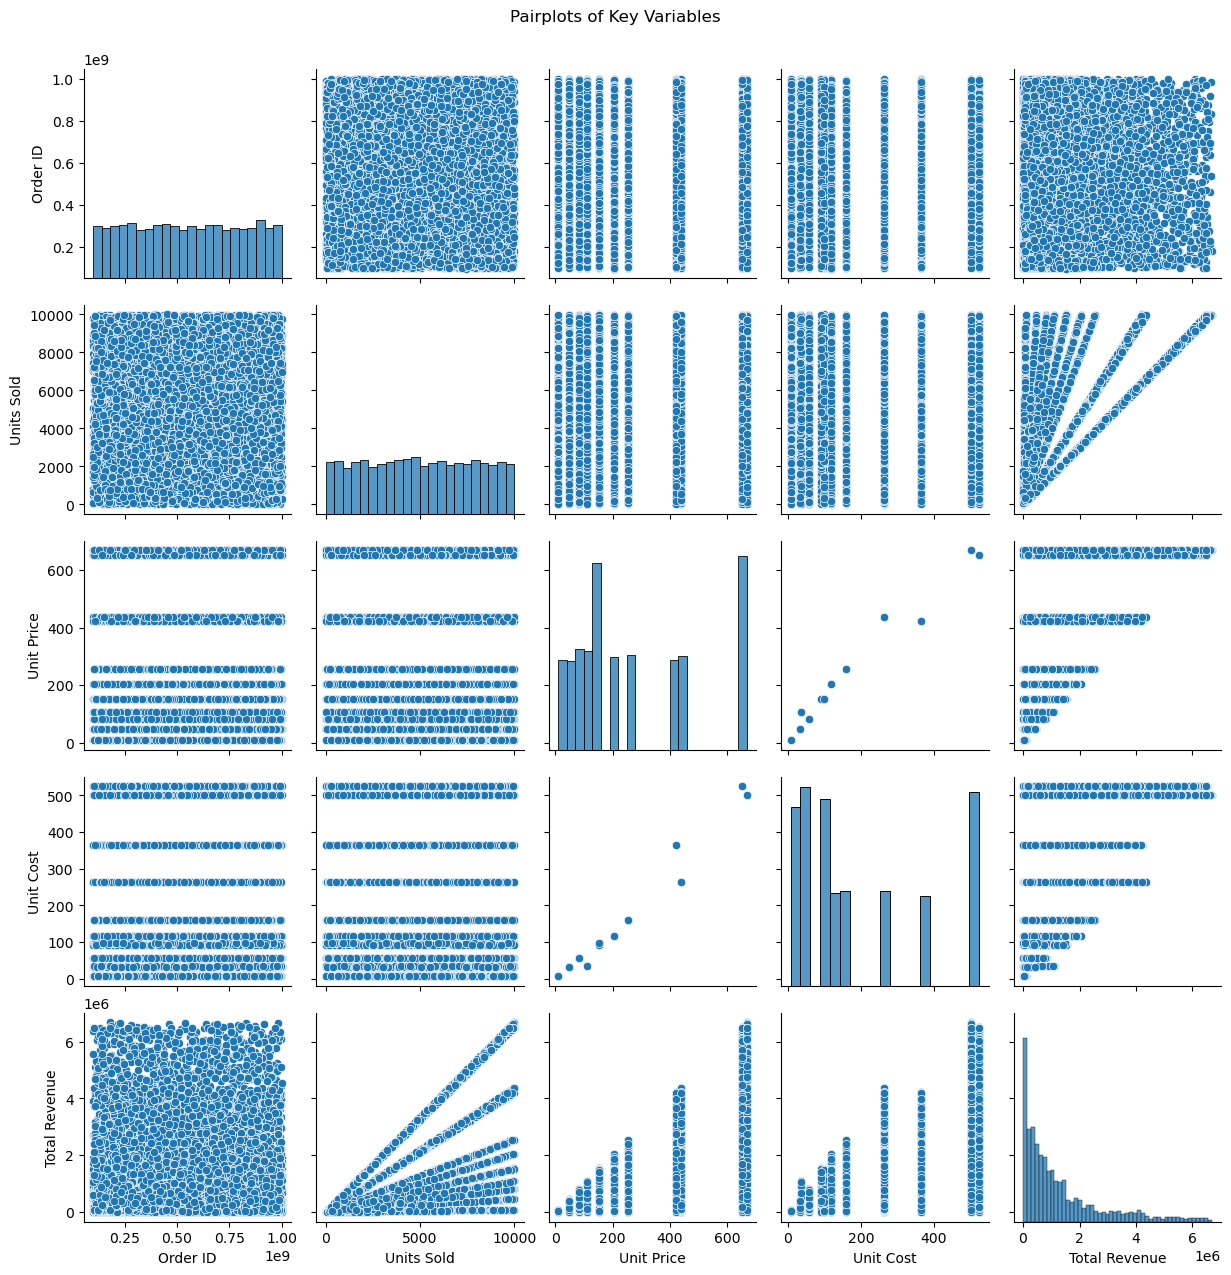

--- Strongest Positive Relationships ---
Total Revenue  Total Cost      0.987874
Unit Price     Unit Cost       0.986324
Total Revenue  Total Profit    0.882012
Total Cost     Total Profit    0.798153
Unit Cost      Total Cost      0.759836
dtype: float64

--- Strongest Negative Relationships ---
Order ID    Units Sold      -0.019732
Units Sold  Unit Price      -0.012978
            Unit Cost       -0.012441
Order ID    Total Cost      -0.009530
            Total Revenue   -0.009288
dtype: float64


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

file_path = r"C:\Users\meetr\OneDrive\Documents\10000 Sales Records.csv"
df = pd.read_csv(file_path)

numeric_df = df.select_dtypes(include=[np.number])

corr_matrix = numeric_df.corr(method='pearson')

plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

key_vars = numeric_df.columns[:5] 
sns.pairplot(numeric_df[key_vars])
plt.suptitle('Pairplots of Key Variables', y=1.02)
plt.show()

unstacked_corr = corr_matrix.unstack()
pairs = unstacked_corr[unstacked_corr < 1.0].drop_duplicates()

print("--- Strongest Positive Relationships ---")
print(pairs.nlargest(5))
print("\n--- Strongest Negative Relationships ---")
print(pairs.nsmallest(5))